In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt


In [69]:
files.upload()

Saving RELIANCE.csv to RELIANCE.csv


{'RELIANCE.csv': b'"Symbol","Series","Date","Prev Close","Open Price","High Price","Low Price","Last Price","Close Price","Average Price","Total Traded Quantity","Turnover","No. of Trades","Deliverable Qty","% Dly Qt to Traded Qty"\n"RELIANCE","EQ","15-May-2017","       1350.45","       1356.40","       1356.40","       1333.50","       1343.60","       1344.10","       1344.22","    1540213","          2070378803.20","      75812","     802733","         52.12"\n"RELIANCE","EQ","16-May-2017","       1344.10","       1346.05","       1376.90","       1341.00","       1356.20","       1356.30","       1360.59","    2892947","          3936121463.60","      79767","    1238129","         42.80"\n"RELIANCE","EQ","17-May-2017","       1356.30","       1353.00","       1365.95","       1347.75","       1350.00","       1353.10","       1354.16","    2250304","          3047263294.20","      56277","    1225837","         54.47"\n"RELIANCE","EQ","18-May-2017","       1353.10","       1340.25

# 4.1

In [0]:
data=pd.read_csv('Bollinger.csv')

In [5]:
data.head()

Unnamed: 0 Symbol Series  ... 14 Day STD  Upper Band  Lower Band
0           1   MRPL     EQ  ...        NaN         NaN         NaN
1           2   MRPL     EQ  ...        NaN         NaN         NaN
2           3   MRPL     EQ  ...        NaN         NaN         NaN
3           4   MRPL     EQ  ...        NaN         NaN         NaN
4           5   MRPL     EQ  ...        NaN         NaN         NaN

[5 rows x 23 columns]

In [0]:
data.dropna(axis=0,subset=['14 Day MA'],inplace=True)

In [7]:
data.head()

Unnamed: 0 Symbol Series  ... 14 Day STD  Upper Band  Lower Band
13          14   MRPL     EQ  ...   3.823268  138.735821  123.442750
14          15   MRPL     EQ  ...   3.825320  138.750641  123.449359
15          16   MRPL     EQ  ...   3.701286  138.027572  123.222428
16          17   MRPL     EQ  ...   3.360902  136.850375  123.406768
17          18   MRPL     EQ  ...   3.216273  136.236117  123.371026

[5 rows x 23 columns]

In [0]:
data['Call']=np.ones(data.shape[0])

In [0]:
data.loc[data['Open Price']<=data['Lower Band'],'Call']='Buy'
data.loc[(data['Open Price']>data['Lower Band']) & (data['Open Price']<data['14 Day MA']),'Call']='Hold Buy/ Liquidate Short'
data.loc[(data['Open Price']>=data['14 Day MA']) & (data['Open Price']<data['Upper Band']),'Call']='Hold Short/ Liquidate Buy'
data.loc[data['Open Price']>=data['Upper Band'],'Call']='Short'

In [0]:
metric=['Buy','Hold Buy/ Liquidate Short','Hold Short/ Liquidate Buy','Short']

In [11]:
data['Call'].head()

13    Hold Short/ Liquidate Buy
14    Hold Short/ Liquidate Buy
15    Hold Short/ Liquidate Buy
16    Hold Buy/ Liquidate Short
17    Hold Buy/ Liquidate Short
Name: Call, dtype: object

In [0]:
X=data[['Open Price','14 Day MA','Lower Band','Upper Band']]

In [0]:
y=data['Call']

In [0]:
le=LabelEncoder()

In [0]:
y=le.fit_transform(y)

In [0]:
std=StandardScaler()

In [0]:
a=std.fit_transform(X)

In [0]:
X_train,X_test,y_train,y_test=train_test_split(a,y,test_size=0.2)

# Different classification models

## Logistic Regression

In [0]:
LRModel=LogisticRegression()

In [0]:
param={'C':np.logspace(-3,3,7),"penalty":["l1","l2"]}
LRModel_cv=GridSearchCV(LRModel,param,cv=10)

In [0]:
LRModel_cv.fit(X_train,y_train)

In [25]:
print("tuned hpyerparameters :(best parameters) ",LRModel_cv.best_params_)
print("accuracy :",LRModel_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l1'}
accuracy : 0.9427083333333334


In [0]:
pred=LRModel_cv.predict(X_test)

In [27]:
accuracy_score(y_test,pred)

0.8958333333333334

## Random Forest

In [0]:
RFC=RandomForestClassifier()
param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [29]:
RFC_cv = GridSearchCV(RFC,param, cv= 10)
RFC_cv.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [30]:
print("tuned hpyerparameters :(best parameters) ",RFC_cv.best_params_)
print("accuracy :",RFC_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
accuracy : 0.8229166666666666


In [0]:
SupportVectorMachine=SVC(kernel='rbf')

In [0]:
param= {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1]}

In [0]:
SupportVectorMachine_cv=  GridSearchCV(SupportVectorMachine, param, cv=10)

In [34]:
SupportVectorMachine_cv.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
print("tuned hpyerparameters :(best parameters) ",SupportVectorMachine_cv.best_params_)
print("accuracy :",SupportVectorMachine_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10, 'gamma': 1}
accuracy : 0.8828125


### So the best accuracy we get is from out Logistic regression **model**

## Predicting Calls for other stock

In [0]:
AdaniPorts=pd.read_csv('ADANIPORTS.csv')

In [0]:
AdaniPorts['14 Day MA'] = AdaniPorts['Close Price'].rolling(window=14).mean()
AdaniPorts['14 Day STD'] = AdaniPorts['Close Price'].rolling(window=14).std()

In [0]:
AdaniPorts['Upper Band'] = AdaniPorts['14 Day MA'] + (AdaniPorts['14 Day STD'] * 2)
AdaniPorts['Lower Band'] = AdaniPorts['14 Day MA'] - (AdaniPorts['14 Day STD'] * 2)

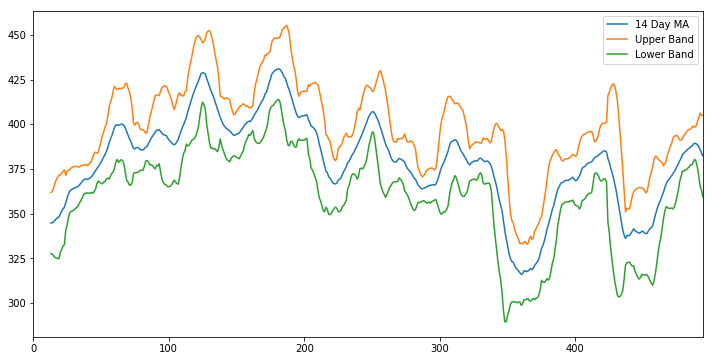

In [39]:
AdaniPorts[['14 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.show();

In [0]:
AdaniPorts.dropna(axis=0,subset=['14 Day MA'], inplace=True)

In [0]:
AdaniPorts['Call']=LRModel_cv.predict(std.fit_transform(AdaniPorts[['Open Price','14 Day MA','Lower Band','Upper Band']]))

In [0]:
AdaniPorts.loc[(AdaniPorts['Call']==0),'Call']=metric[0]
AdaniPorts.loc[(AdaniPorts['Call']==1),'Call']=metric[1]
AdaniPorts.loc[(AdaniPorts['Call']==2),'Call']=metric[2]
AdaniPorts.loc[(AdaniPorts['Call']==3),'Call']=metric[3]

# 4.2

In [0]:
Reliance=pd.read_csv('RELIANCE.csv')

In [80]:
Reliance.head()

Symbol Series  ... Deliverable Qty  % Dly Qt to Traded Qty
0  RELIANCE     EQ  ...          802733                   52.12
1  RELIANCE     EQ  ...         1238129                   42.80
2  RELIANCE     EQ  ...         1225837                   54.47
3  RELIANCE     EQ  ...         1339478                   59.85
4  RELIANCE     EQ  ...         1444387                   49.32

[5 rows x 15 columns]

In [0]:
Reliance['Open_Close % Change']=Reliance['Close Price']/Reliance['Open Price'].shift(1) -1

In [0]:
Reliance['Low_High % Change']=Reliance['Low Price']/Reliance['High Price'].shift(1) -1

In [0]:
Reliance['5 Day RM']=Tcs['Close Price'].rolling(5).mean()
Reliance['5 Day RS']=Tcs['Close Price'].rolling(5).std()

In [0]:
Reliance.dropna(axis=0,subset=['5 Day RM'],inplace=True)

In [0]:
Reliance['Action']=np.nan

In [0]:
val=[]

In [0]:
for i in range(Reliance.index[0],Reliance.index[-1]):
  if(Reliance.loc[i+1]['Close Price']>Reliance.loc[i]['Close Price']):
    val.append(1)
  else:
    val.append(-1)


In [0]:

Reliance.drop(Reliance.tail(1).index,inplace=True)

In [0]:
Reliance['Action']=val

In [0]:
def Classification_model(X_train,X_test,y_train,y_test):
  print("Started training Logistic Regresion Model\n")
  LRModel=LogisticRegression()
  param={'C':np.logspace(-3,3,7),"penalty":["l1","l2"]}
  LRModel_cv=GridSearchCV(LRModel,param,cv=10)
  LRModel_cv.fit(X_train,y_train)
  print("For Logistic Regression\n")
  print("tuned hpyerparameters :(best parameters) ",LRModel_cv.best_params_)
  print("accuracy :",LRModel_cv.best_score_)
  pred=LRModel_cv.predict(X_test)
  print("Accuracy Score for test data: ", accuracy_score(y_test,pred))
  print("Started training Random Forest  Model\n")
  RFC=RandomForestClassifier()
  param = { 
      'n_estimators': [200, 500],
      'max_features': ['auto', 'sqrt', 'log2'],
      'max_depth' : [4,5,6,7,8],
      'criterion' :['gini', 'entropy']
  }
  RFC_cv = GridSearchCV(RFC,param, cv= 10)
  RFC_cv.fit(X_train, y_train)
  print("For Random Forest\n")
  print("tuned hpyerparameters :(best parameters) ",RFC_cv.best_params_)
  print("accuracy :",RFC_cv.best_score_)
  pred=RFC_cv.predict(X_test)
  print("Accuracy Score for test data: ", accuracy_score(y_test,pred))
  print("Started training SVC  Model\n")
  
  SupportVectorMachine=SVC(kernel='rbf')
  param= {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1]}
  SupportVectorMachine_cv=  GridSearchCV(SupportVectorMachine, param, cv=10)
  SupportVectorMachine_cv.fit(X_train,y_train)
  print("tuned hpyerparameters :(best parameters) ",SupportVectorMachine_cv.best_params_)
  print("For SupportVectorMachine_cv\n")
  print("accuracy :",SupportVectorMachine_cv.best_score_)
  pred=SupportVectorMachine_cv.predict(X_test)
  print("Accuracy Score for test data: ", accuracy_score(y_test,pred))
  


Reliance.head()

In [0]:
X=Reliance[['Open_Close % Change','Low_High % Change','5 Day RM','5 Day RS']]

In [0]:
y=Reliance['Action']

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
Classification_model(X_train,X_test,y_train,y_test)

Started training Logistic Regresion Model



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

For Logistic Regression

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1'}
accuracy : 0.5515463917525774
Accuracy Score for test data:  0.5204081632653061
Started training Random Forest  Model



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


For Random Forest

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
accuracy : 0.5412371134020618
Accuracy Score for test data:  0.5408163265306123
Started training SVC  Model

tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 0.01}
For SupportVectorMachine_cv

accuracy : 0.5695876288659794
Accuracy Score for test data:  0.5204081632653061


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
